<a href="https://colab.research.google.com/github/guhasouvik/LungCancer_classifier/blob/main/CONVERGENT_DL_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [125]:
da = pd.read_excel('/content/drive/MyDrive/bioinfo/selected_features.xlsx',header=None)

In [126]:
da.shape

(51, 2528)

In [153]:
X = da.iloc[0:, 1:2528].values
Y = da.iloc[0:, 0].values

In [154]:
len(Y)

51

In [166]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
X = np.asarray(X).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle= True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 18, activation = 'relu', input_dim = 2527,name='layer1'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 12, activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 9, activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = classifier.fit(X_train, y_train,validation_split = 0.3, epochs=150, batch_size=2)

Epoch 1/150
12/12 [==============================] - 2s 30ms/step - loss: 0.7396 - accuracy: 0.4583 - val_loss: 0.4929 - val_accuracy: 0.5455
Epoch 2/150
12/12 [==============================] - 0s 8ms/step - loss: 0.5869 - accuracy: 0.4583 - val_loss: 0.4319 - val_accuracy: 0.5455
Epoch 3/150
12/12 [==============================] - 0s 9ms/step - loss: 0.5216 - accuracy: 0.6250 - val_loss: 0.3902 - val_accuracy: 0.6364
Epoch 4/150
12/12 [==============================] - 0s 8ms/step - loss: 0.5002 - accuracy: 0.6250 - val_loss: 0.3701 - val_accuracy: 0.8182
Epoch 5/150
12/12 [==============================] - 0s 8ms/step - loss: 0.5200 - accuracy: 0.7083 - val_loss: 0.3646 - val_accuracy: 0.9091
Epoch 6/150
12/12 [==============================] - 0s 9ms/step - loss: 0.4477 - accuracy: 0.7083 - val_loss: 0.3685 - val_accuracy: 0.9091
Epoch 7/150
12/12 [==============================] - 0s 8ms/step - loss: 0.4360 - accuracy: 0.7083 - val_loss: 0.3705 - val_accuracy: 0.7273
Epoch 8/150


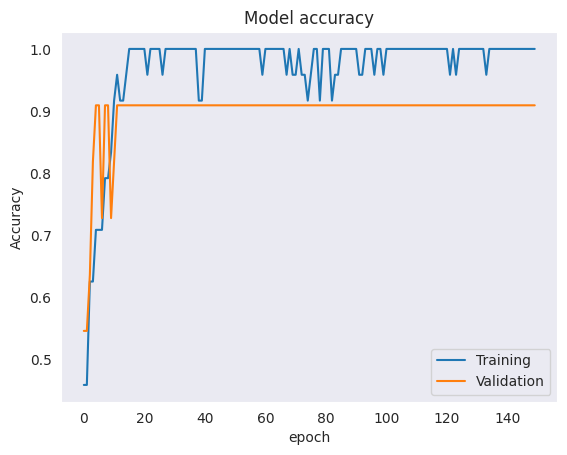

0.9680555538336436

In [173]:
import statistics as stat
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid()
plt.show()
stat.mean(history.history['accuracy'])

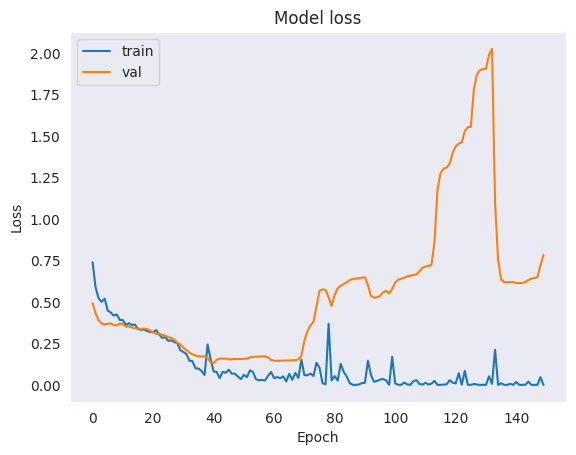

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlim=150
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [168]:
y_pred = classifier.predict(X_test)
y_pred
y_pred = y_pred >0.5

1/1 [==============================] - 0s 66ms/step


In [170]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/16)*100))
#93.33

Our accuracy is 100.0%


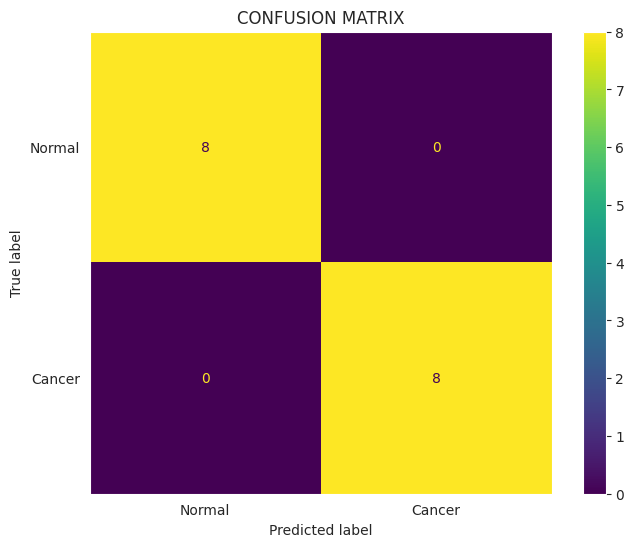

In [175]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
ax.grid(False)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=["Normal","Cancer"])
ax.set(title='CONFUSION MATRIX')
#cm_display.plot()
cm_display.plot(ax=ax)

In [121]:
Sensi = metrics.recall_score(y_test, y_pred)
Sensi*100
#87.5

100.0

In [122]:
Precision = metrics.precision_score(y_test, y_pred)
Precision*100
#88.889
#100

100.0

In [123]:
Specificity = metrics.recall_score(y_test, y_pred,pos_label=0)
Specificity
#85.


1.0

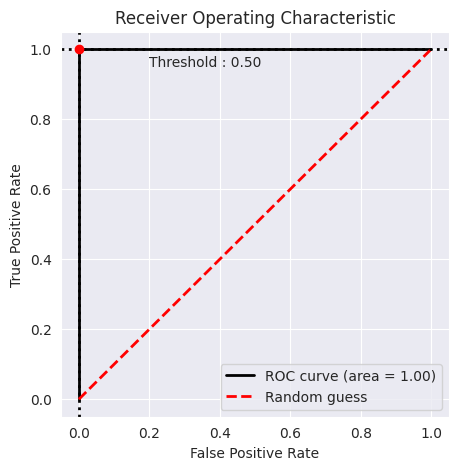

In [172]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()